# Assessment Merbourne Housing Market

## Import The Data

In [100]:
# import important packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as st
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [3]:
# read csv file

url = 'https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv'

df = pd.read_csv(url)
df = df.copy()
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## Data Exploration

In [4]:
# Data exploration


def data_exploration(df):

    # check number of rows and columns
    shape = df.shape
    print("Number of rows:", shape[0])
    print("Number of columns:", shape[1])

    # check duplicates
    check_duplicates = df.duplicated().sum()
    print("Number of duplicates:", check_duplicates)

    # Create a summary DataFrame
    summary_df = pd.DataFrame({
                        'Column': df.columns,
                        'Data Type': df.dtypes,
                        'Non-Null Count': df.notnull().sum(),
                        'Missing Values': df.isnull().sum(),
                        'Unique Values': df.nunique()
                })

    # Reset index to make 'Column' a regular column
    summary_df.reset_index(drop=True, inplace=True)

    # Display the summary DataFrame
    summary_df
    
    # check numerical columns
    numerical_columns = df.select_dtypes("number").columns
    print("\nNumerical Columns:", numerical_columns)

    # check categorical columns
    categorical_columns = df.select_dtypes("object").columns
    print("\nCategorical Columns:", categorical_columns)

    return summary_df

In [5]:
data_exploration(df)

Number of rows: 34857
Number of columns: 21
Number of duplicates: 1

Numerical Columns: Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

Categorical Columns: Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,Suburb,object,34857,0,351
1,Address,object,34857,0,34009
2,Rooms,int64,34857,0,12
3,Type,object,34857,0,3
4,Price,float64,27247,7610,2871
5,Method,object,34857,0,9
6,SellerG,object,34857,0,388
7,Date,object,34857,0,78
8,Distance,float64,34856,1,215
9,Postcode,float64,34856,1,211


## Answering questions

In [7]:
df['Price'].isnull().sum()

7610

In [9]:
# Check data loss if we drop null values in the price column

data_loss_after_dropping_null_in_price = (df['Price'].isnull().sum())/df.shape[0]*100
data_loss_after_dropping_null_in_price

21.83205668875692

In [15]:
# Check most common type of property and its percentage

# Frequency table for 'Type'
frequency_table = df['Type'].value_counts()

# Calculating the proportion of each unique value in the 'Type' 
proportion_table = df['Type'].value_counts(normalize=True) 

frequency_table, proportion_table

(Type
 h    23980
 u     7297
 t     3580
 Name: count, dtype: int64,
 Type
 h    0.687954
 u    0.209341
 t    0.102705
 Name: proportion, dtype: float64)

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_20428\1186431062.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");


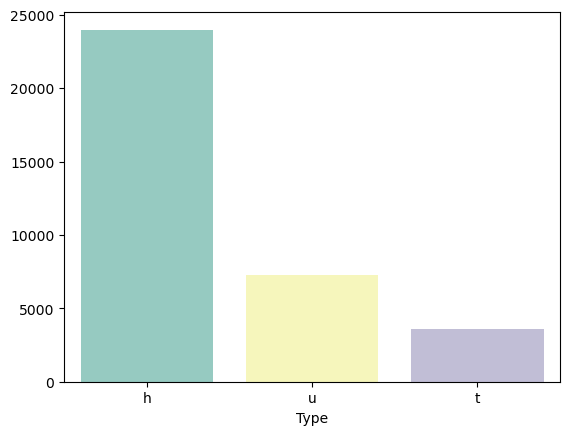

In [16]:
# create graph to show frequency of each property type in descending order

# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");

In [18]:
# understand the relationship between number of rooms with the median property price

# check median of property price 
df['Price'].median()

870000.0

In [20]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [33]:
# check the median price for each room
median_price = df.groupby('Rooms')['Price'].median().reset_index()
median_price = median_price.rename(columns={'Price':'median_price'})
median_price

,Rooms,median_price
0,1,390000.0
1,2,678000.0
2,3,900000.0
3,4,1205250.0
4,5,1550000.0
5,6,1660000.0
6,7,1350000.0
7,8,1535883.0
8,9,1380000.0
9,10,2115000.0


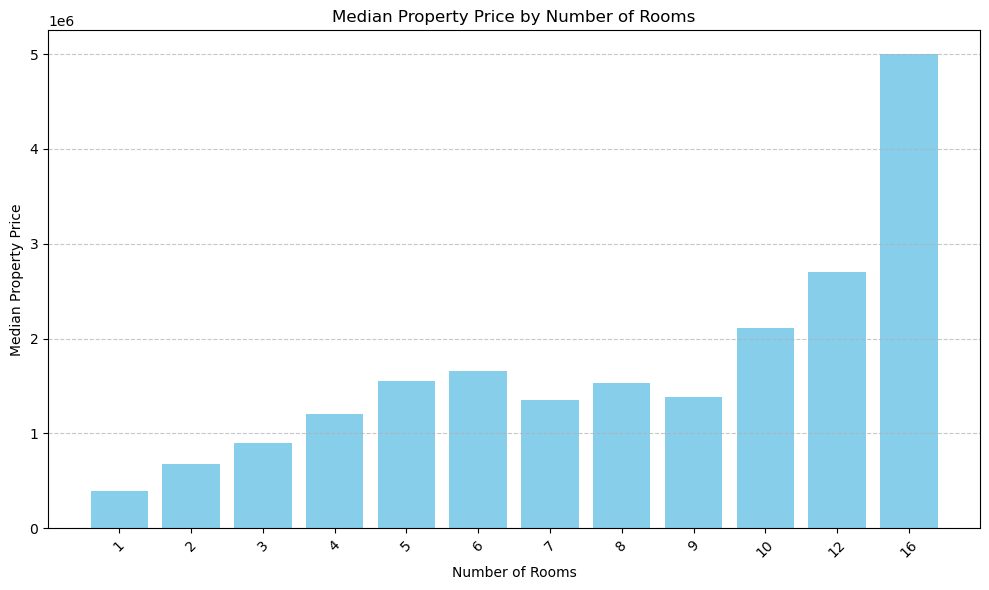

In [34]:
# plot the relationship with a bar chart
plt.figure(figsize=(10, 6))
plt.bar(median_price['Rooms'].astype(str), median_price['median_price'], color='skyblue')
plt.xlabel('Number of Rooms')
plt.ylabel('Median Property Price')
plt.title('Median Property Price by Number of Rooms')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

In [35]:
# check the non-parametric correlation coefficient with Spearman correlation coefficient

correlation = median_price['median_price'].corr(median_price['Rooms'], method='spearman')
correlation

0.8881118881118882

In [36]:
# also check with Pearson method

correlation = median_price['median_price'].corr(median_price['Rooms'])
correlation

0.9153995583277854

The correlation is strong.

In [43]:
# create function for numerical correlation

def numerical_correlation(df, column1, column2):

    # check correlation with Pearson method
    correlation_pearson = df[column1].corr(df[column2])

    # check correlation with Spearman method
    correlation_spearman = df[column1].corr(df[column2], method='spearman')

    print('Pearson correlation:', correlation_pearson)
    print('Spearman correlation:', correlation_spearman)


In [45]:
# check relationship between the distance from the Central Business District (CBD) and property price 

numerical_correlation(df, 'Distance', 'Price')

Pearson correlation: -0.21138434279158302
Spearman correlation: -0.18809341092744206


<Axes: xlabel='Distance', ylabel='Price'>

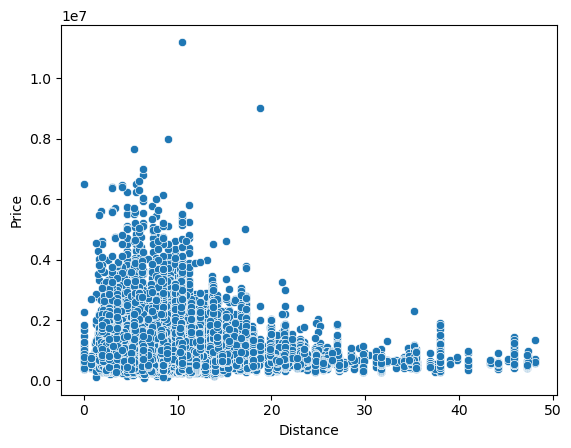

In [40]:
# Plotting a scatter plot to visualize the relationship between 'Distance' and 'Price'
sns.scatterplot(df, x='Distance', y='Price')

It has a weak negative correlation.

In [46]:
# Check relationship between the property size and price

numerical_correlation(df,'Landsize','Price')

Pearson correlation: 0.03274836524947046
Spearman correlation: 0.2766120625869772


<Axes: xlabel='Landsize', ylabel='Price'>

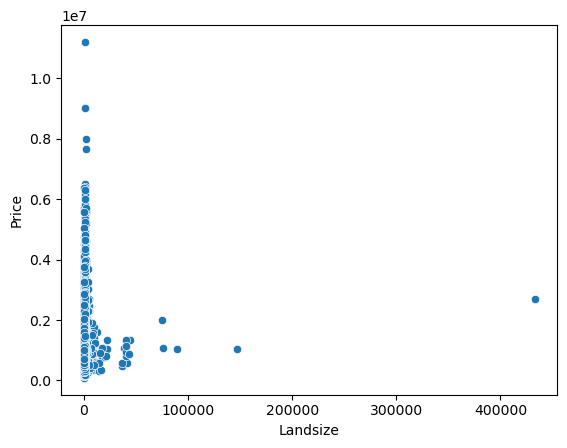

In [48]:
# try to visualize with scatter plot
sns.scatterplot(df, x='Landsize', y='Price')

In [49]:
# create quantile-based discretization function to categorize the Landsize variable

# categorize Landsize into bin
def categorize_by_quantiles(df, column, q):
    df[f'{column}_bin'] = pd.qcut(df[column], q=q, labels=False)
    return df

In [52]:
# calculate median price for each quantile bin
def calculate_median_price_by_bin(df, bin_column):
    median_prices = df.groupby(bin_column)['Price'].median().reset_index()
    median_prices = median_prices.rename(columns={'Price': 'median_price'})
    return median_prices

In [55]:
# categorize using q = 7

df_quantile_7 = categorize_by_quantiles(df, 'Landsize', 7)
df_quantile_7.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Landsize_bin
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,1.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,1.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,1.0


In [57]:
# calcuate median price by bin

median_prices_quantile_7 = calculate_median_price_by_bin(df_quantile_7, 'Landsize_bin')
median_prices_quantile_7.head(3)


,Landsize_bin,median_price
0,0.0,600000.0
1,1.0,922000.0
2,2.0,1011000.0


In [61]:
# recheck the correlation
numerical_correlation(median_prices_quantile_7, 'Landsize_bin', 'median_price')

Pearson correlation: 0.7987113114455878
Spearman correlation: 0.7857142857142859


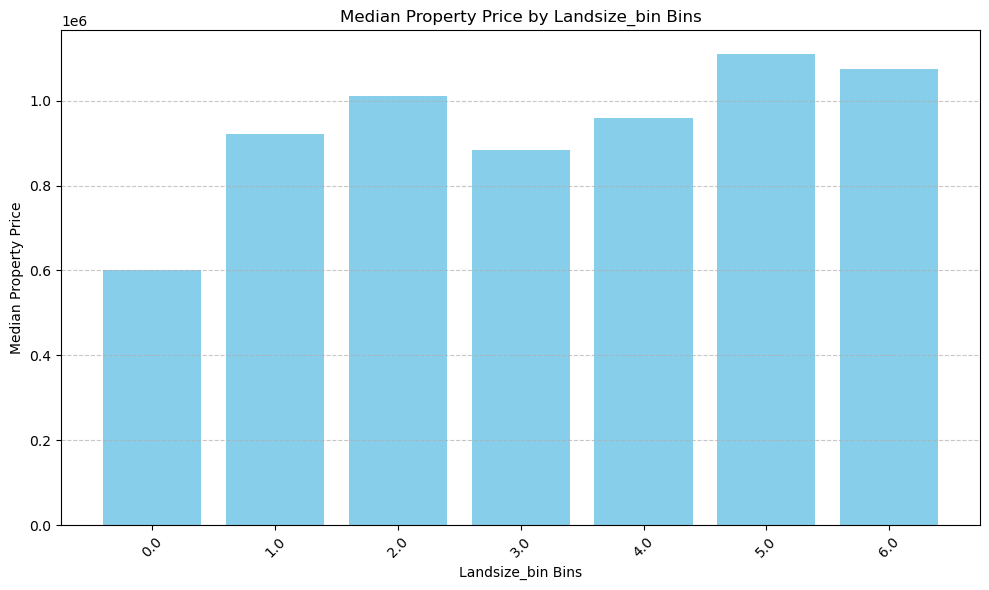

In [62]:
# plot the result with bar plot

plt.figure(figsize=(10, 6))
plt.bar(median_prices_quantile_7['Landsize_bin'].astype(str), median_prices_quantile_7['median_price'], color='skyblue')
plt.xlabel(f'{'Landsize_bin'} Bins')
plt.ylabel('Median Property Price')
plt.title(f'Median Property Price by {'Landsize_bin'} Bins')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [63]:
# using lower quantile value

# categorize using q = 3

df_quantile_3 = categorize_by_quantiles(df, 'Landsize', 3)

# calcuate median price by bin
median_prices_quantile_3 = calculate_median_price_by_bin(df_quantile_3, 'Landsize_bin')

# recheck the correlation
numerical_correlation(median_prices_quantile_3, 'Landsize_bin', 'median_price')

Pearson correlation: 0.9984499057461949
Spearman correlation: 1.0


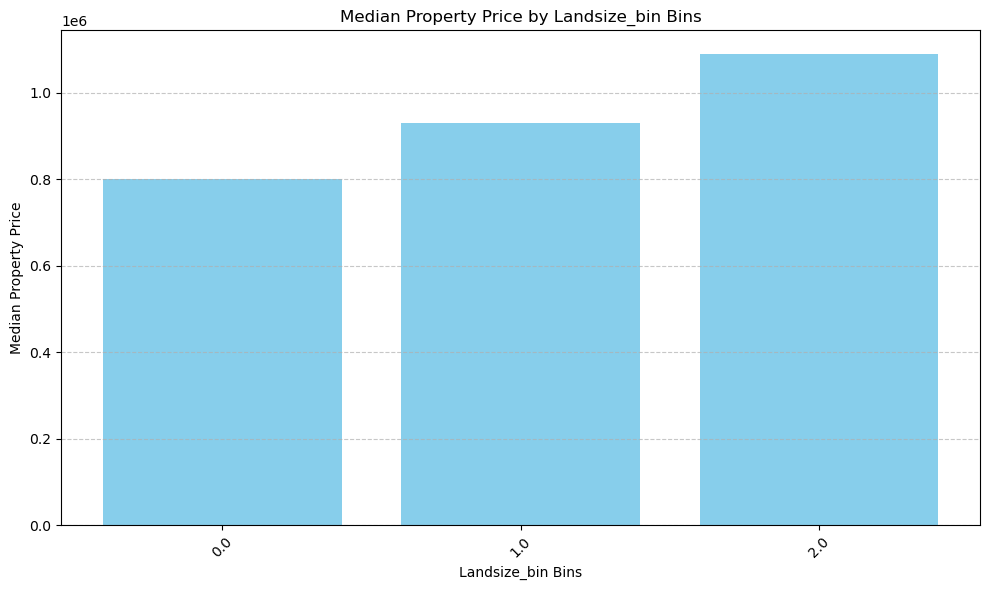

In [64]:
# plot the result with bar plot

plt.figure(figsize=(10, 6))
plt.bar(median_prices_quantile_3['Landsize_bin'].astype(str), median_prices_quantile_3['median_price'], color='skyblue')
plt.xlabel(f'{'Landsize_bin'} Bins')
plt.ylabel('Median Property Price')
plt.title(f'Median Property Price by {'Landsize_bin'} Bins')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_20428\623333174.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Type', y='Price', palette="coolwarm")


<Axes: xlabel='Type', ylabel='Price'>

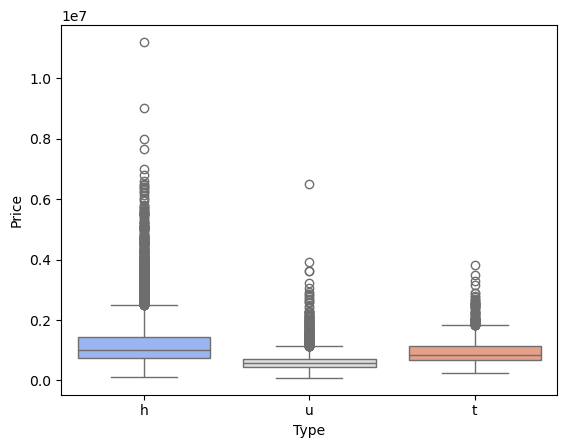

In [65]:
# Does the dataset contain any properties that are priced significantly above/below average?

# create box plot to detect outliers
sns.boxplot(data=df, x='Type', y='Price', palette="coolwarm")

In [66]:
# Use Tukey's method with a 1.5 threshold to create a new dataframe withotu outliers

def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [69]:
data_series = df['Price']  
outliers = tukeys_test_outliers(data_series)
outliers

135      2850000.0
142      2300000.0
146      2485000.0
152      2615000.0
158      2575000.0
           ...    
34619    2300000.0
34623    2610000.0
34632    2500000.0
34714    2855000.0
34719    2685000.0
Name: Price, Length: 1278, dtype: float64

In [73]:
# calculate percentage of outliers

total_data = len(data_series)
total_outliers = len(outliers)
percentage_outliers = (total_outliers/total_data)*100

print('Percentage of outliers in the properties data:', percentage_outliers)

Percentage of outliers in the properties data: 3.6664084688871674


In [67]:
# Remove outliers from df['Price']

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

df_without_outliers = df[(df['Price'] >= Q1 - 1.5 * IQR) & 
                (df['Price'] <= Q3 + 1.5 * IQR)]

df_without_outliers.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Landsize_bin
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,0.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,0.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,0.0


Text(0.5, 1.0, 'Q-Q Plot of Price')

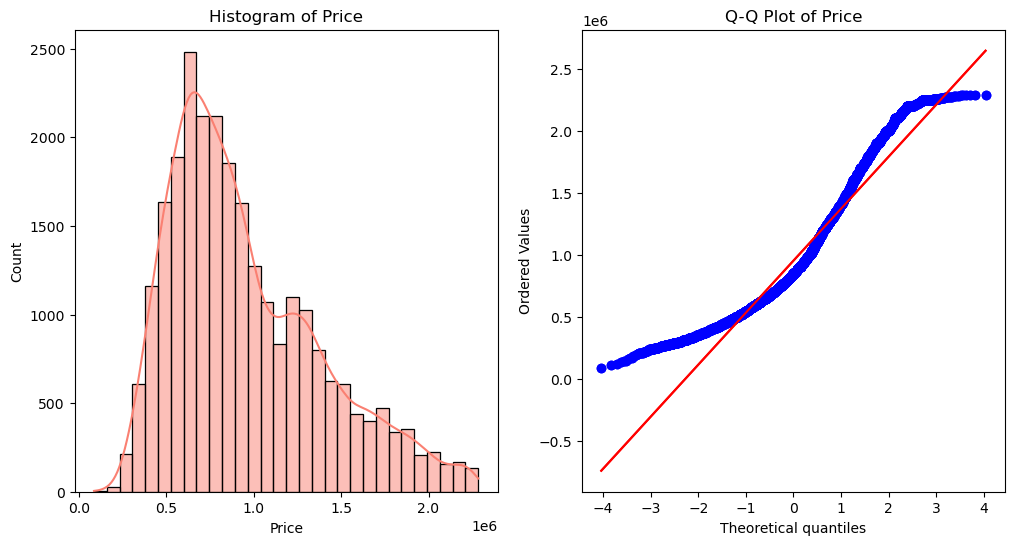

In [89]:
# Q-Q plot to compare distribution of property's price to a normal distribution
# additional: create histogram to understand it better

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_without_outliers['Price'], kde=True, bins=30, color="salmon")
plt.title(f'Histogram of {'Price'}')

# Q-Q plot 
plt.subplot(1, 2, 2)
stats.probplot(df_without_outliers['Price'], dist="norm", plot=plt)
stats.probplot(df_without_outliers['Price'], plot=plt)
plt.title(f'Q-Q Plot of {'Price'}')

In [90]:
# calculate skew and kurtosis

skewness = round(df_without_outliers['Price'].skew(),2)
kurtosis = round(df_without_outliers['Price'].kurtosis(),2)

print('Skewness:', skewness)
print('Kurtosis:', kurtosis)


Skewness: 0.86
Kurtosis: 0.13


In [92]:
# Performing a normality test with Kolmogorov-Smirnov test

standardized_column = (df_without_outliers['Price'] - df_without_outliers['Price'].mean()) / df_without_outliers['Price'].std()
ks_test_statistic, ks_p_value = stats.kstest(standardized_column, 'norm')

ks_test_statistic, ks_p_value

# print the test result
if ks_p_value < 0.05:
    print('The test results indicate that the distribution is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution is not significantly different from a normal distribution.')



The test results indicate that the distribution is significantly different from a normal distribution.


Text(0, 0.5, 'Price')

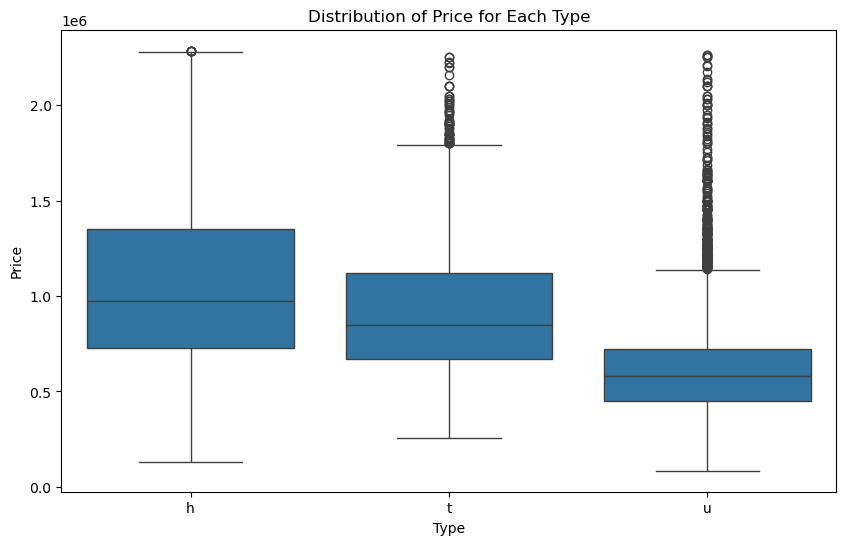

In [93]:
# How prices differ between different property types
# Boxplot to show distribution of property prices of each property type

plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=df_without_outliers)

# Add titles and labels
plt.title('Distribution of Price for Each Type')
plt.xlabel('Type')
plt.ylabel('Price')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Northern Metropolitan'),
  Text(1, 0, 'Western Metropolitan'),
  Text(2, 0, 'Southern Metropolitan'),
  Text(3, 0, 'Eastern Metropolitan'),
  Text(4, 0, 'South-Eastern Metropolitan'),
  Text(5, 0, 'Eastern Victoria'),
  Text(6, 0, 'Northern Victoria'),
  Text(7, 0, 'Western Victoria')])

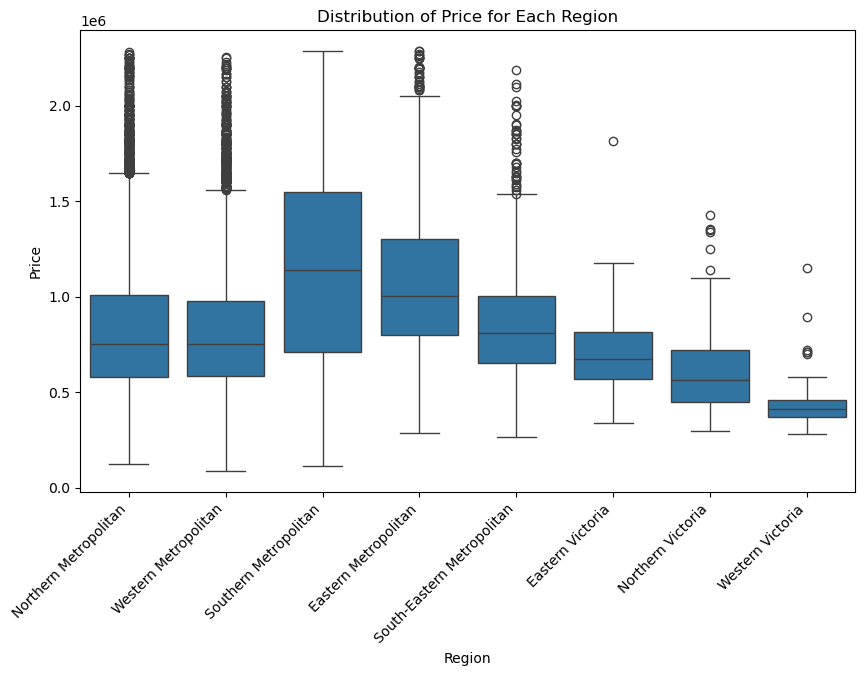

In [95]:
# Region with highest and lowest median price

plt.figure(figsize=(10, 6))
sns.boxplot(x='Regionname', y='Price', data=df_without_outliers)

# Add titles and labels
plt.title('Distribution of Price for Each Region')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')

In [101]:
# Divide the price variable into five distinct ranges
df_without_outliers['Price_Bin'] = pd.qcut(df_without_outliers['Price'], q=5, labels=False)
crosstab_result = pd.crosstab(df_without_outliers['Regionname'], df_without_outliers['Price_Bin'])

# Use chi-square test to assess the independence between region and price 
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result) # _, _ is for the return of running the code. We just tell python that we will place those returns there. But we dont care about it.

chi2_p_value 


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_20428\3273352124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers['Price_Bin'] = pd.qcut(df_without_outliers['Price'], q=5, labels=False)


0.0

In [102]:
# Use Cramer's V coefficient to quantify the strenth of the association

association(crosstab_result, method="cramer")

0.20238506416984992

In [116]:
# Percentage increase/decrease in median price of properties sold between the earliest and latest year

# change Date type from object into datetime
df_without_outliers['Date'] = pd.to_datetime(df_without_outliers['Date'], errors='coerce')

# take year and add into a new column
df_without_outliers['Year'] = df_without_outliers['Date'].dt.year

df_without_outliers.dtypes

median_2016 = df_without_outliers[df_without_outliers['Year'] == 2016]['Price'].median()
median_2018 = df_without_outliers[df_without_outliers['Year'] == 2018]['Price'].median()
percentage_sales_year = (median_2018 - median_2016)/median_2016*100
percentage_sales_year

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_20428\1145169419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers['Date'] = pd.to_datetime(df_without_outliers['Date'], errors='coerce')
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_20428\1145169419.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers['Year'] = df_without_outliers['Date'].dt.year


-9.190751445086704

In [119]:
# Specific month during which more houses are sold

# take year and add into a new column
df_without_outliers['Month'] = df_without_outliers['Date'].dt.month
df_without_outliers['Month'].value_counts()

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_20428\2388520659.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers['Month'] = df_without_outliers['Date'].dt.month


Month
3.0     2215
9.0     1123
10.0    1053
8.0     1002
7.0      997
6.0      968
12.0     828
4.0      772
11.0     690
1.0      371
Name: count, dtype: int64